$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\Xvh}{\hat{\mathbf{X}}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Zvh}{\hat{\mathbf{Z}}}
\newcommand{\Ev}{\mathbf{E}}
\newcommand{\onev}{\mathbf{1}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$


# A2.4 Three-Layer Neural Network

* A2.4: Now the output from Code Cell [11] is correct. I hadn't rerun it for A2.3.   
* A2.3: One more fix to Code Cell [11], in how results are appended.
* A2.2: The line `results.append([n_iterations, nh1, nh2, 'scg', result_scg['ftrace'][-1]])` has been corrected.  It had used `'sgd'` before.
* A2.1: Replaced the diagram with one having more details. Modified the math equations for clarity. Added another example run showing the expected generality of your functions. A2grader.zip now available.
* A2.0: the original assignment description

Sarah Houlton

For this assignment, we modify the two-layer neural network matrix equations and code from lecture notes to become a three-layer neural network, one with two hidden layers.  In the following diagram, you will be adding another layer on the left between in the inputs, $x$, and the show hiddden layer.

You must complete three steps.
1. Complete the matrix equations using latex notation in the markdown cell,
2. Implement the required functions in python.
3. Perform the described experiments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas
import optimizers as opt  # from Lecture Notes

## Network Diagram

![Two Layers](http://www.cs.colostate.edu/~anderson/cs545/notebooks/net-A2.png)

## Matrix Equations

Here are the matrix equations for a network with two hidden layers.

$$ 
\begin{align*}
N &= \text{ number of samples } \\
I &= \text{ the number of attributes in each sample }\\
K &= \text{ number of units in output layer } \\
H_1 &= \text{ number of units in first hidden layer }\\
H_2 &= \text{ number of units in second hidden layer }\\
~\\
\Zv_1 &= \tanh(\Xvh\, \Uv) \\
\Zv_2 &= \tanh(\Zvh_1\, \Vv) \\
\Yv &= \Zvh_2\, \Wv\\
\Ev &= \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (\Tv_{n,k} - \Yv_{n,k})^2 \\
~\\
\nabla_\Yv E_{n,k} &= \frac{-2}{NK} (\Tv_{n,k} - \Yv_{n,k})\\
\delta_\Yv &= \frac{-2}{NK} (\Tv - \Yv)\\
\nabla_\Wv E &=  \underbrace{\underbrace{\Zvh_2^T}_{H+1\times N} \underbrace{\delta_\Yv}_{N\times K}}_{H+1\times K}\\
~\\
\nabla_\Vv E &= \underbrace{\underbrace{\Xvh^T}_{I+1\times N} \; \underbrace{\delta_{\Zv_2}}_{N\times H}}_{I+1\times H} \;\;\;\;\text{ where } \delta_{\Zv_2} = (\delta_\Yv \; \Wv_{1:}^T)\; \cdot\; (1-\Zv_2^2) \;\;\;\; \text{ if } f(\Xvh \Vv) = \tanh(\Xvh \Vv)\\
\nabla_\Uv E &= \underbrace{\underbrace{\Xvh^T}_{I+1\times N} \; \underbrace{\delta_{\Zv_1}}_{N\times H}}_{I+1\times H} \;\;\;\;\text{ where } \delta_{\Zv_1} = (\delta_\Yv \; \Wv_{1:}^T)\; \cdot\; (1-\Zv_1^2) \;\;\;\; \text{ if } f(\Xvh \Vv) = \tanh(\Xvh \Vv)\\
\end{align*}
$$

## Code

Modify the functions `network` `error_gradient` and `mse` to do the compuations for a three-layer neural network.  They must have the following arguments:
* `Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=False)`
or
* `Y, Z1, Z2 = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=True)`
* `gradient = error_gradient(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)`
* `mean_squared_error = mse(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)`

In [2]:
def network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=False):
    n_U = (n_inputs + 1) * n_hiddens_1
    n_V = (n_hiddens_1 + 1) * n_hiddens_2
    n_W = (n_inputs + 1)* (n_hiddens_1) + (n_hiddens_1 + 1)* n_hiddens_2 + (n_hiddens_2 + 1) * n_outputs
    U = w[:n_U].reshape((n_inputs + 1, n_hiddens_1))
    V = w[n_U: n_U + n_V].reshape((n_hiddens_1 + 1, n_hiddens_2))
    W = w[n_U + n_V:].reshape((n_hiddens_2 + 1, n_outputs))
    Z1 = np.tanh(U[0:1, :] + X @ U[1:, :])
    Z2 = np.tanh(V[0:1, :] + Z1 @ V[1:, :])
    
    Y = W[0:1, :] + Z2 @ W[1:, :]
    return (Y, Z1, Z2) if all_outputs else Y

In [71]:
def error_gradient(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T):
    Y, Z1, Z2 = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=True)
    n_samples = X.shape[0]
    delta_Y = -2 / (n_samples * n_outputs) * (T - Y)
    Z2_hat = np.insert(Z2, 0, 1, axis=1)
    dEdW = Z2_hat.T @ delta_Y
    
    
    n_W = (n_inputs + 1)* (n_hiddens_1) + (n_hiddens_1 + 1)* n_hiddens_2 + (n_hiddens_2 + 1) * n_outputs
    print(delta_Y.shape, w[-n_W:].shape)
    W = w[-n_W:].reshape((n_hiddens_2 + 1, n_outputs))
    delta_Z1 = (delta_Y @ W[1:, :].T) * (1 - Z1**2)
    delta_Z2 = (delta_Y @ W[1:, :].T) * (1 - Z2**2)
    X_hat = np.insert(X, 0, 1, axis=1)
    dEdV = X_hat.T @ delta_Z2
    dEdU = X_hat.T @ delta_Z1
    

    dEdw = np.hstack((dEdU.flatten(), dEdV.flatten(), dEdW.flatten()))
    return dEdw

This method throws an error that I could never quite figure it out. It's coming from how I shape W, but I wasn't able to get it right before the deadline.

In [72]:
def mse (w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T):
    Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)
    return np.mean((T - Y)**2)

In [73]:
X = np.arange(3 * 4).reshape((3, 4)) * 0.1
T = np.hstack(( np.sin(X[:, 0:1]) + X[:, 1:2],
                X[:, 2:3] * -0.5,
                X[:, 3:4] ** 2))
n_inputs = X.shape[1]
n_outputs = T.shape[1]
n_hiddens_1 = 6
n_hiddens_2 = 2
n_w = (n_inputs + 1) * n_hiddens_1 + (n_hiddens_1 + 1) * n_hiddens_2 + (n_hiddens_2 + 1) * n_outputs
w = (np.arange(n_w) - n_w/2) * 0.01
Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)
Y, Z1, Z2 = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=True)

In [74]:
grad = error_gradient(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)
grad

(3, 3) (53,)


ValueError: cannot reshape array of size 53 into shape (19,3)

## Test on Air Quality Data
Use your code to, as before, predict CO from the Hour of the day.

Set up the data matrices `X` and `T` as follows.

In [21]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data [:23 * 20]  # first 20 days of data
data = data.dropna(axis=0)
print('data.shape =', data.shape)

hour = [int(t[:2]) for t in data['Time']]
X = np.array(hour).reshape(-1, 1)
CO = data['CO(GT)']
T = np.array(CO).reshape(-1, 1)
np.hstack((X, T))[:10]  # show the first 10 samples of hour, CO

data.shape = (443, 2)


array([[18. ,  2.6],
       [19. ,  2. ],
       [20. ,  2.2],
       [21. ,  2.2],
       [22. ,  1.6],
       [23. ,  1.2],
       [ 0. ,  1.2],
       [ 1. ,  1. ],
       [ 2. ,  0.9],
       [ 3. ,  0.6]])

Define the network parameters.  Use the shapes of `X` and `T` to assign the number of inputs and outputs.  Define each of the two hidden layers to have 5 units.

In [22]:
n_inputs = X.shape[1]
n_hiddens_1 = 5
n_hiddens_2 = 5
n_outputs = T.shape[1]

Now we must define the intial weight vector.  The vector contains a value for each weight in all three layers.

In [23]:
n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs

initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1

Before training our network, standardize the input values, to change the hour to have zero mean and unit variance across the set of samples.  Change `True` to `False` to not perform this step, allowing you to compare results with and without standardization.  It is not required to show the results here.  When you check in your notebook, leave `standardize` set to `True`.

In [24]:
standardize = True

if standardize:
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    
    X = (X - X_mean) / X_std
    
print(f'X mean is {X.mean(axis=0)[0]:.3f} and its standard deviation is {X.std(axis=0)[0]:.3f}')

X mean is 0.000 and its standard deviation is 1.000


Now we can train our network using each of our three optimization algorithms.

In [25]:
n_iterations = 2000

result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)
print(f'SGD final error is {result_sgd["ftrace"][-1]:.3f} and it took {result_sgd["time"]:.2f} seconds')

result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                       n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)
print(f'Adam final error is {result_adam["ftrace"][-1]:.3f} and it took {result_adam["time"]:.2f} seconds')

result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations,
                     save_wtrace=True)
print(f'SCG final error is {result_scg["ftrace"][-1]:.3f} and it took {result_scg["time"]:.2f} seconds')

(443, 1) ()


ValueError: cannot reshape array of size 46 into shape (6,1)

Examine the error curve and the model fits for each of the optimization algorithms.

NameError: name 'result_sgd' is not defined

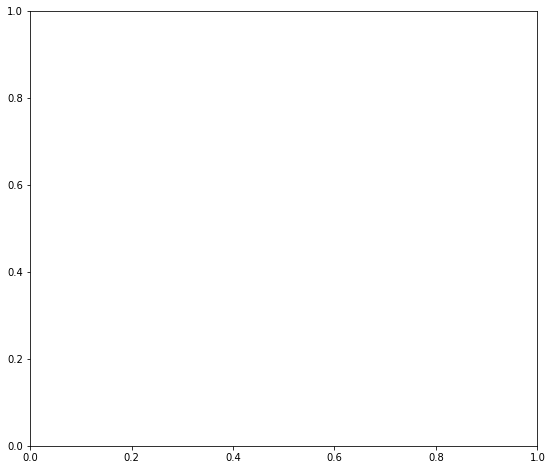

In [26]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(result_sgd['ftrace'], label='SGD')
plt.plot(result_adam['ftrace'], label='Adam')
plt.plot(result_scg['ftrace'], label='SCG')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.ylim(0, 4)

plt.subplot(1, 2, 2)
if standardize:
    plt.plot(X * X_std + X_mean, T, 'k.')  # unstandardize X
else:
    plt.plot(X, T, 'k.')
xs = np.linspace(0, 23, 100).reshape((-1, 1))
xs_standardized = (xs - X_mean) / X_std if standardize else xs
plt.plot(xs, network(result_sgd['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='SGD')
plt.plot(xs, network(result_adam['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='Adam')
plt.plot(xs, network(result_scg['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='SCG')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('CO');

Here is some code that tries a number of values for the key parameters of `n_iterations`, `n_hiddens_1`, `n_hiddens_2` and `learning_rate`.

**Required:** Modify the lists of values in the four for loops to try other parameter values.  Try to find ranges that work well for all three algorithms.

In [ ]:
results = []
for n_iterations in [10, 100]:
    for nh1 in [1, 2]:
        for nh2 in [1, 2]:
            
            n_U = (n_inputs + 1) * nh1
            n_V = (nh1 + 1) * nh2
            n_W = (nh2 + 1) * n_outputs
            initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)

            result_scg = opt.scg(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                                 n_iterations=n_iterations)
            results.append([n_iterations, nh1, nh2, 0, 'scg', result_scg['ftrace'][-1]])
            
            for lr in [1e-3, 1e-5]:
                
                result_sgd = opt.sgd(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=lr, momentum_rate=0)
                result_adam = opt.adam(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                                       n_iterations=n_iterations, learning_rate=lr)
 
                results.append([n_iterations, nh1, nh2, lr, 'sgd', result_sgd['ftrace'][-1]])
                results.append([n_iterations, nh1, nh2, lr, 'adam', result_adam['ftrace'][-1]])

results = pandas.DataFrame(results, columns=('Iterations', 'nh1', 'nh2', 'lr', 'algo', 'mse'))
results

**Required:** Show the results for the 20 lowest MSE values, sorted by increasing MSE. Read about the `sort_values` and `head` methods on a `DataFrame`.  You can do this with a single line of python code.

In [ ]:
results.head(results.sort_values(ascending=False), n=20)

Since you have cleverly written your code to handle any value of $I$, $H_1$, $H_2$, and $K$, your code should be able to handle the following data that contains three attributes for each of 5 samples and two output values for each sample.

In [ ]:
X = np.arange(15).reshape((5, 3))
T = np.hstack((X[:, 0:1] * 0.1 * X[:, 1:2], X[:, 2:]**2)) # making two target values for each sample
T = T.reshape((5, 2))
print('  Input            Target')
for x, t in zip(X, T):
    print(x, '\t', t)

Let's use your code to train a neural network with two hidden layers, having 50 units in the first hidden layer and 3 units in the second hidden layer.  This example does not perform the standardization step.

In [ ]:
n_hiddens_1 = 50
n_hiddens_2 = 3
n_iterations = 1000


n_inputs = X.shape[1]
n_outputs = T.shape[1]

n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs

initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1

result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)
print(f'SGD final error is {result_sgd["ftrace"][-1]:.3f} and it took {result_sgd["time"]:.2f} seconds')

result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                       n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)
print(f'Adam final error is {result_adam["ftrace"][-1]:.3f} and it took {result_adam["time"]:.2f} seconds')

result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations,
                     save_wtrace=True)
print(f'SCG final error is {result_scg["ftrace"][-1]:.3f} and it took {result_scg["time"]:.2f} seconds')

In [ ]:
w = result_scg['w']

Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)
Y.shape

In [ ]:
def plot_diagonal(T, Y):
    a = min(T.min(), Y.min())
    b = max(T.max(), Y.max())
    plt.plot([a, b], [a, b], '-', lw=3, alpha=0.5)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(result_scg['ftrace'])
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('SCG')

plt.subplot(1, 3, 2)
plt.plot(T[:, 0], Y[:, 0], '.')
plot_diagonal(T[:, 0], Y[:, 0])
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('$Y_1$')

plt.subplot(1, 3, 3)
plt.plot(T[:, 1], Y[:, 1], '.')
plot_diagonal(T[:, 1], Y[: 1])
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('$Y_2$');

In [7]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Houlton-A2.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
X = np.arange(3 * 4).reshape((3, 4)) * 0.1
T = np.hstack(( np.sin(X[:, 0:1]) + X[:, 1:2],
                X[:, 2:3] * -0.5,
                X[:, 3:4] ** 2))
n_inputs = X.shape[1]
n_outputs = T.shape[1]
n_hiddens_1 = 6
n_hiddens_2 = 2
n_w = (n_inputs + 1) * n_hiddens_1 + (n_hiddens_1 + 1) * n_hiddens_2 + (n_hiddens_2 + 1) * n_outputs
w = (np.arange(n_w) - n_w/2) * 0.01
Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)


--- 20/20 points. Returned correct values.

Testing
Y, Z1, Z2 = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=True)


--- 20/20 points. Returned correct values.

Testing
grad = error_gradient(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)


--- 0/20 points. network raised the 